### Instituto Tecnológico de Costa Rica

#### Profesor: Sergio Arriola Valverde.

#### Taller de Comunicaciones Electricas.

Integrantes:
- Jorge Andrés Brenes Alfaro.
- Pablo César Calderón Piedra.
- Kimberly María Carvajal Méndez.
- Jason Steven Valverde Picado.

# Simulación de Canal

### Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

### Adquisición de datos
Se utiliza el documento de texto llamado Codigocompleto previamente guardado en el bloque de codificación, el cual contiene el código Hamming que se transmitirá hacia el canal.

In [2]:
f = open ('Codigocompleto.txt','r')
mensajeTx = f.read()
f.close()
bits = np.array([int(mensajeTx[0])])
for i in range(len(mensajeTx)-1):
    a = np.array([[int(mensajeTx[i+1])]])
    bits=np.concatenate((bits, a), axis=None)

## Modelado de canal AGWN
En este apartado se realiza la adición de ruido a la señal binaria enviada, el ruido está en función del SNR escogido por lo que se puede variar su afectación sobre el mensaje.

Código base y fórmulas extraídos de: GaussianWaves, "Simulate additive white Gaussian noise (AWGN) channel", 2015. [Online] Disponible en: https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/

In [3]:
SNRdB = np.arange(0,15,0.1)
BER= []
hammingn = 15
for snrdb in SNRdB:
    gamma = 10**(snrdb/10)
    if bits.ndim==1:
        P=sum(abs(bits)**2)/len(bits)
    else:
        P=sum(sum(abs(bits)**2))/len(bits) 
    N0=P/gamma
    if isrealobj(bits):
        n = sqrt(N0/2)*standard_normal(bits.shape)
    else:
        n = sqrt(N0/2)*(standard_normal(bits.shape)+1j*standard_normal(bits.shape))
    mensajeRx = bits + n
    
    mensajedetectado = []
    errores=0
    for j in range(len(mensajeRx)):
        if mensajeRx[j] >= 0.5:
            mensajedetectado.append(1)
        else:
            mensajedetectado.append(0)
        if int(mensajeTx[j]) != mensajedetectado[j]:
            errores +=1
    BER.append(errores/len(mensajeTx))
    
print('Mensaje Tx', '   \t', 'Mensaje Rx')
for i in range(len(mensajeRx)):
    print(mensajeTx[i], '\t \t', mensajeRx[i])

### Guardado se datos importantes
Se crea el documento de Excel llamado "Señal con Ruido" para guardar el mensaje que recibirá el receptor. También se crea el documento de texto llamado "BER" con el cual se obtienen la cantidad de errores dependiendo del SNR dado.

In [4]:
df = pd.DataFrame({'Señal con ruido': mensajeRx})
writer = ExcelWriter('Señal con ruido.xlsx')
df.to_excel(writer, 'Señal', index=False)
writer.save()

if hammingn == 7:
    df = pd.DataFrame({'SNR': SNRdB, 'BER': BER})
    writer = ExcelWriter('BER.xlsx')
    df.to_excel(writer, 'BER', index=False)
    writer.save()
else:
    df = pd.DataFrame({'SNR': SNRdB, 'BER2': BER})
    writer = ExcelWriter('BER2.xlsx')
    df.to_excel(writer, 'BER', index=False)
    writer.save()

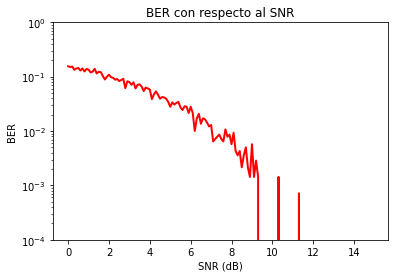

In [5]:
plt.plot(SNRdB, BER, color='red', linewidth=2)
plt.title('BER con respecto al SNR')
plt.xlabel('SNR (dB)')
plt.ylim([0.0001,1])
plt.ylabel('BER')
plt.yscale('log')
plt.show()